In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# since the first column and third column are not required we can drop them
data_without_columns = data.drop(['car_ID','CarName'], axis = 1)
data_without_columns.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# let us do some feature engineering
# using volume instead of three individual features
data_without_columns['car_volume'] = data_without_columns['carlength'] * data_without_columns['carwidth'] * data_without_columns['carheight']
data_without_columns = data_without_columns.drop(['carlength', 'carwidth', 'carheight'], axis=1)

# cominging weight and horsepower
data_without_columns['weightbypower'] = data_without_columns['curbweight'] / data_without_columns['horsepower']
data_without_columns = data_without_columns.drop(['curbweight', 'horsepower'], axis=1)

# removing some other features
data_without_columns = data_without_columns.drop(['enginesize', 'doornumber', 'symboling'], axis=1)

data_without_columns.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price,car_volume,weightbypower
0,gas,std,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,2.68,9.0,5000,21,27,13495.0,528019.904,22.954955
1,gas,std,convertible,rwd,front,88.6,dohc,four,mpfi,3.47,2.68,9.0,5000,21,27,16500.0,528019.904,22.954955
2,gas,std,hatchback,rwd,front,94.5,ohcv,six,mpfi,2.68,3.47,9.0,5000,19,26,16500.0,587592.640,18.331169
3,gas,std,sedan,fwd,front,99.8,ohc,four,mpfi,3.19,3.40,10.0,5500,24,30,13950.0,634816.956,22.911765
4,gas,std,sedan,4wd,front,99.4,ohc,five,mpfi,3.19,3.40,8.0,5500,18,22,17450.0,636734.832,24.556522


In [5]:
#we can now convert the categorical data into numerical data
data_without_categorical = pd.get_dummies(data_without_columns, drop_first=True)
data_without_categorical.head()

,wheelbase,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price,car_volume,weightbypower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,3.47,2.68,9.0,5000,21,27,13495.0,528019.904,22.954955,...,False,False,False,False,False,False,False,True,False,False
1,88.6,3.47,2.68,9.0,5000,21,27,16500.0,528019.904,22.954955,...,False,False,False,False,False,False,False,True,False,False
2,94.5,2.68,3.47,9.0,5000,19,26,16500.0,587592.640,18.331169,...,False,False,False,False,False,False,False,True,False,False
3,99.8,3.19,3.40,10.0,5500,24,30,13950.0,634816.956,22.911765,...,False,False,False,False,False,False,False,True,False,False
4,99.4,3.19,3.40,8.0,5500,18,22,17450.0,636734.832,24.556522,...,False,False,False,False,False,False,False,True,False,False


In [6]:
# now let us define x and y
X = data_without_categorical.drop('price', axis=1).values
Y = data_without_categorical['price'].values
print(X.shape)
print(Y.shape)

(205, 37)
(205,)


In [7]:
# normalizing data
X_normalized = (X - X.mean()) / (X.max() - X.min())
Y_normalized = (Y - Y.mean()) / (Y.max() - Y.min())
print(X_normalized)
print(Y_normalized)

[[-0.01983145391654646 -0.019932079483105304 -0.01993301328079803 ...
  -0.01993499907842306 -0.019936181100818913 -0.019936181100818913]
 [-0.01983145391654646 -0.019932079483105304 -0.01993301328079803 ...
  -0.01993499907842306 -0.019936181100818913 -0.019936181100818913]
 [-0.019824479984410934 -0.01993301328079803 -0.019932079483105304 ...
  -0.01993499907842306 -0.019936181100818913 -0.019936181100818913]
 ...
 [-0.0198072224574315 -0.01993194946064176 -0.01993278869654282 ...
  -0.01993499907842306 -0.019936181100818913 -0.019936181100818913]
 [-0.0198072224574315 -0.0199326232134074 -0.019932162224673016 ...
  -0.019936181100818913 -0.019936181100818913 -0.019936181100818913]
 [-0.0198072224574315 -0.019931713056162596 -0.01993245773027198 ...
  -0.01993499907842306 -0.019936181100818913 -0.019936181100818913]]
[ 5.41903156e-03  8.00181081e-02  8.00181081e-02  1.67143992e-02
  1.03601843e-01  4.89868782e-02  1.10056339e-01  1.40094569e-01
  2.63102364e-01  1.13759407e-01  7.828

In [8]:
# LET US NOW DEFINE SOME FUNCTIONS WHICH WILL BE CALLED LATER

In [9]:
def calculate_cost (X,Y,w,b,m):
    Y_hat = np.dot(X, w) + b
    cost = (1 / ( 2 * m )) * np.sum((Y_hat - Y) ** 2)
    return cost

In [10]:
def gradient_descent (X, Y, w, b, iterations, learning_rate, m):
    cost_list = []
    for i in range(iterations):
        Y_hat = np.dot(X, w) + b
        w_derivative = (1 / m) * np.dot(X.T, (Y_hat - Y))
        b_derivative = (1 / m) * np.sum(Y_hat - Y)
        w = w - learning_rate * w_derivative
        b = b - learning_rate * b_derivative
        cost = calculate_cost(X, Y, w, b, m)
        cost_list.append(cost) 
        if i % 50 == 0:
            print("The iteration is", i, "and cost is", cost)

    return w , b, cost_list

In [11]:
# let us define some parameters
learning_rate = 1
b = 0
w = np.zeros(X_normalized.shape[1])
iterations = 1000
m = len(Y)

w, b, cost_list = gradient_descent(X_normalized, Y_normalized, w, b, iterations, learning_rate, m)


The iteration is 0 and cost is 0.019470639365829483
The iteration is 50 and cost is 0.016128697807624517
The iteration is 100 and cost is 0.014271395137034562
The iteration is 150 and cost is 0.013237938620669163
The iteration is 200 and cost is 0.012662891965320168
The iteration is 250 and cost is 0.012342916720623284
The iteration is 300 and cost is 0.012164869977226116
The iteration is 350 and cost is 0.012065796018126728
The iteration is 400 and cost is 0.0120106646118603
The iteration is 450 and cost is 0.01197998400811534
The iteration is 500 and cost is 0.011962908479806493
The iteration is 550 and cost is 0.01195340317659296
The iteration is 600 and cost is 0.011948110147610803
The iteration is 650 and cost is 0.011945160939896393
The iteration is 700 and cost is 0.011943515896641489
The iteration is 750 and cost is 0.011942596525210781
The iteration is 800 and cost is 0.01194208093695174
The iteration is 850 and cost is 0.011941790024476769
The iteration is 900 and cost is 0.0

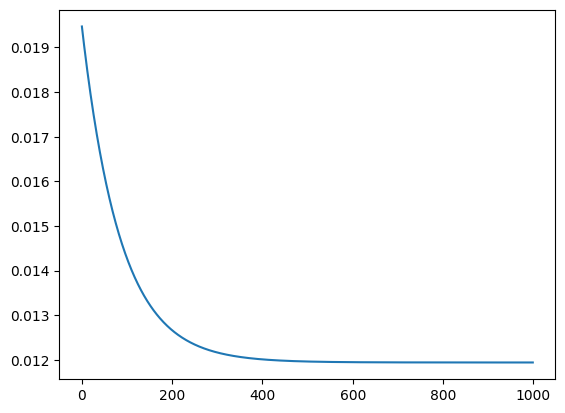

Values of w after iterations [0.01842198061545627 0.018396509032514597 0.018381314014558142
 0.018322779765401278 0.02233338393572712 0.017743849028080547
 0.01772997644419471 1.3145730219258125 0.017760356214543725
 0.01838480416035265 0.01838711617399033 0.018392577319693775
 0.018380271052476152 0.018380530321430444 0.018367468709123473
 0.01833917925355437 0.018428233034857227 0.018393093324240103
 0.018385234639205453 0.01837572599697349 0.01835768984305961
 0.01838750145687562 0.0183987396467481 0.01838467472723315
 0.018387428189892394 0.018331089671136783 0.01841151749948345
 0.018382885333816722 0.018385852684367238 0.01838467472723315
 0.018352238602537877 0.01838383421743149 0.018379737235190662
 0.018383080680846754 0.018416180222655513 0.018383702942271703
 0.018382791689153192]
Value of b after iterations: -0.9220830993782289


In [12]:
rng = np.arange(0, iterations)
plt.plot(rng, cost_list)
plt.show()
print("Values of w after iterations", w)
print("Value of b after iterations:", b)

In [13]:
Y_hat_normalized = np.dot(X_normalized, w) + b  
Y_hat = Y_hat_normalized * (Y.max() - Y.min()) + Y.mean()  # Convert back to original scale

rmse = np.sqrt(np.mean((Y_hat - Y) ** 2))
print("RMSE:", rmse)

RMSE: 6225.223357280426
